In [1]:
MODEL_NAME = 'italiaNet_v4'
IMG_SIZE = 128


In [2]:
##CONSTRUCTING THE NETWORK##

from tflearn.layers.core import input_data, fully_connected, dropout
from tflearn.layers.conv import conv_2d, max_pool_2d
from tflearn.layers.estimator import regression

net = input_data(shape=(None,128,128,3))
net = conv_2d(net, 32, 3, activation='relu',regularizer='L2')
net = max_pool_2d(net, 2)

net = conv_2d(net, 64, 3, activation='relu',regularizer='L2')
net = max_pool_2d(net, 2)

net = conv_2d(net, 128, 3, activation='relu',regularizer='L2')
net = max_pool_2d(net, 2)

net = conv_2d(net, 256, 3, activation='relu',regularizer='L2')
net = max_pool_2d(net, 2)

net = conv_2d(net, 512, 3, activation='relu',regularizer='L2')
net = max_pool_2d(net, 2)

net = fully_connected(net, 1024, activation='relu')
net = dropout(net, 0.9)

net = fully_connected(net, 2, activation='softmax')

net = regression(net, optimizer='adam', learning_rate=1e-4,
                     loss='categorical_crossentropy')

In [3]:
#LOAD DATA FOR DISPLAY##
import matplotlib.pyplot as plt
import numpy as np
import random
from tflearn.models.dnn import DNN

model = DNN(net)
model.load('{}.model'.format(MODEL_NAME))

INFO:tensorflow:Restoring parameters from /Users/default/Desktop/Code/Italianet/italiaNet_v4.model


In [8]:
##DISPLAY DATA##
import h5py
def batch_test():
    h5f = h5py.File('dataset.h5', 'r')
    imgs = np.asarray(h5f['X'])
    labels = h5f['Y']
    fig = plt.figure()
    random.shuffle(imgs)

    for num, data in enumerate(imgs[-12:]):
        img_data = data
        y = fig.add_subplot(3,4,num+1)
        orig = img_data
        data = img_data.reshape(IMG_SIZE, IMG_SIZE, 3)

        model_out = model.predict([data])[0]

        if np.argmax(model_out) == 1: str_label = 'Pizza'
        else: str_label = 'Calzone'

        pizzaness = round(model_out[1]*100, 2)

       # if pizzaness >= 50:
       #     str_label = '{}% pizza'.format(pizzaness)
       # else:
       #     str_label = '{}% calzone'.format(100-pizzaness)

        y.imshow(orig)
        plt.title(str_label, x=0.5, y=0.05, fontsize=11, bbox = dict(facecolor='white', alpha=0.5))
        y.axes.get_xaxis().set_visible(False)
        y.axes.get_yaxis().set_visible(False)

    plt.show()

In [9]:
def show_sample():
    import cv2
    import numpy as np
    from matplotlib import pyplot as plt

    img = cv2.imread("sample.jpg")
    orig = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    im = cv2.resize(orig,(128,128))/255

    model_out = model.predict([im])[0]
    print(model_out)
    pizzaness = round(model_out[1]*100, 2)

    if pizzaness >= 50:
        str_label = '{}% Pizza'.format(pizzaness)
    else:
        str_label = '{}% Calzone'.format(100-pizzaness)

    plt.imshow(orig,interpolation='nearest')
    plt.title(str_label, x=0.5, y=0.85, fontsize=24, bbox = dict(facecolor='white', alpha=0.5))
    plt.axis('off')
    plt.show()


In [10]:
from tkinter import *
import urllib.request
from tkinter.filedialog import askopenfilename
def process_img(from_web=False, link=''):
    if from_web:
        urllib.request.urlretrieve(link, "input.jpg")
        return "input.jpg"
    else:
        root = Tk()
        root.withdraw()
        file_path = askopenfilename()
        root.update()
        root.destroy()

        return file_path

In [11]:
import matplotlib.pyplot as plt
import cv2
def imgpath_to_plot(image_path):
    #if you dont have this file yet
    #test_data = process_test_data()
    img = cv2.imread(image_path)
    orig = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    im = cv2.resize(orig,(128,128))/255

    model_out = model.predict([im])[0]
    print(model_out)
    pizzaness = round(model_out[1]*100, 2)

    if pizzaness >= 50:
        str_label = '{}% Pizza'.format(pizzaness)
    else:
        str_label = '{}% Calzone'.format(100-pizzaness)

    plt.imshow(orig,interpolation='nearest')
    plt.title(str_label, x=0.5, y=0.85, fontsize=24, bbox = dict(facecolor='white', alpha=0.5))
    plt.axis('off')
    plt.show()


In [12]:
from tkinter import *
def main():
    root = Tk() 

    def quit():
        root.update()
        root.destroy()

    def link_from_web():
        image_path = process_img(from_web = True, link = entry.get())
        imgpath_to_plot(image_path)
        quit()

    def open_path():
        image_path = process_img(from_web = False)
        imgpath_to_plot(image_path)
        quit()

        
    b1 = Button(root, text='Local image', command=open_path)
    b2 = Button(root, text='From link', command=link_from_web)
    b1.pack()#(row=0,column=0)
    Label(root, text='or').pack()
    b2.pack(side=LEFT)#(row=2,column=2)
    
    entry = Entry(root, width=10)
    entry.pack(side=RIGHT)#(row=3,column=3)   
    root.attributes("-topmost", True)
    root.mainloop()

[ 0.14448315  0.85551685]


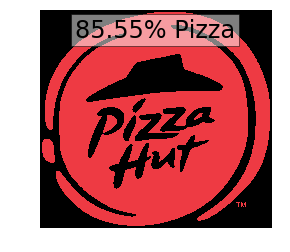

In [13]:
import time
from IPython.display import clear_output
main()